In [3]:
%pylab inline

import pandas as pd
import seaborn as sns
from pathlib import Path
from lxml import etree
from time import strptime


Populating the interactive namespace from numpy and matplotlib


In [24]:
drugtrials = pd.read_json('drugtrials.json')

In [25]:
drugtrials.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110693 entries, NCT00000102 to NCT03267836
Data columns (total 11 columns):
cond_mesh             110693 non-null object
conditions            110693 non-null object
drugs                 110693 non-null object
firstreceived_date    110693 non-null int64
int_mesh              110693 non-null object
nconditions           110693 non-null int64
ndrugs                110693 non-null int64
ninterventions        110693 non-null int64
overall_status        110693 non-null object
phase                 99076 non-null object
study_type            110693 non-null object
dtypes: int64(4), object(7)
memory usage: 10.1+ MB


In [45]:
def unique_terms(series)  :
    unique = set()
    for things in series :
        for thing in things : 
            unique.add(thing)
    return unique

def nunique_terms(series) :
    return len(unique_terms(series))

In [38]:
nconds = len(unique_terms(drugtrials.cond_mesh))
ndrugs = len(unique_terms(drugtrials.int_mesh))

print ('There are {} unique condition MeSH terms attempted by {} unique drug MeSH terms in total.'.format(nconds, ndrugs))

There are 3053 unique condition MeSH terms attempted by 2915 unique drug MeSH terms in total.


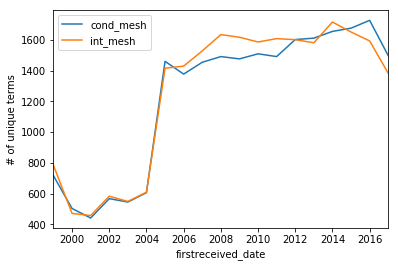

In [67]:
trials = drugtrials.groupby('firstreceived_date')
a = trials.cond_mesh.apply(nunique_terms)
b = trials.int_mesh.apply(nunique_terms)
data = pd.DataFrame([a,b]).T.plot()
ylabel('# of unique terms');

We are pulling top 10 conditions from each year and pool them together, making a set of 'popular' conditions.

In [88]:
from collections import Counter

def  top_terms(series, n=10) : 
    counts= Counter()
    
    for terms in series :
        for t in terms :
            counts[t]+=1

    conds = sorted(counts, key=counts.get, reverse=True)
    
    return conds[:n]

In [94]:
trials.cond_mesh.apply(top_terms)

firstreceived_date
1999    [HIV Infections, Infection, Acquired Immunodef...
2000    [Leukemia, Lymphoma, HIV Infections, Syndrome,...
2001    [HIV Infections, Lymphoma, Breast Neoplasms, L...
2002    [Breast Neoplasms, Lung Neoplasms, Leukemia, L...
2003    [Lymphoma, Lung Neoplasms, Breast Neoplasms, L...
2004    [Breast Neoplasms, Leukemia, Lung Neoplasms, C...
2005    [Breast Neoplasms, Disease, HIV Infections, Di...
2006    [Diabetes Mellitus, Leukemia, Breast Neoplasms...
2007    [Diabetes Mellitus, Breast Neoplasms, Diabetes...
2008    [Diabetes Mellitus, Diabetes Mellitus, Type 2,...
2009    [Diabetes Mellitus, Diabetes Mellitus, Type 2,...
2010    [Diabetes Mellitus, Diabetes Mellitus, Type 2,...
2011    [Diabetes Mellitus, Diabetes Mellitus, Type 2,...
2012    [Diabetes Mellitus, Diabetes Mellitus, Type 2,...
2013    [Diabetes Mellitus, Diabetes Mellitus, Type 2,...
2014    [Diabetes Mellitus, Syndrome, Carcinoma, Breas...
2015    [Diabetes Mellitus, Carcinoma, Breast Neoplas

In [93]:
popular_conditions =  unique_terms(trials.cond_mesh.apply(top_terms))
popular_conditions

{'Acquired Immunodeficiency Syndrome',
 'Breast Neoplasms',
 'Carcinoma',
 'Carcinoma, Non-Small-Cell Lung',
 'Central Nervous System Neoplasms',
 'Colorectal Neoplasms',
 'Communicable Diseases',
 'Diabetes Mellitus',
 'Diabetes Mellitus, Type 2',
 'Disease',
 'HIV Infections',
 'Hepatitis',
 'Hepatitis C',
 'Hypertension',
 'Infection',
 'Leukemia',
 'Leukemia, Lymphoid',
 'Leukemia, Myeloid',
 'Lung Neoplasms',
 'Lymphoma',
 'Lymphoma, Non-Hodgkin',
 'Multiple Myeloma',
 'Myelodysplastic Syndromes',
 'Neoplasms',
 'Nervous System Neoplasms',
 'Pain, Postoperative',
 'Preleukemia',
 'Prostatic Neoplasms',
 'Sarcoma',
 'Schizophrenia',
 'Syndrome'}

In [113]:
for condition in popular_conditions : 
    involved = [ condition in terms for terms in drugtrials.cond_mesh ]
    drugtrials[condition]= involved
    

In [149]:
drugtrials[drugtrials.Schizophrenia].phase.value_counts()

a=trials.phase.value_counts()
for year in range (2008, 2018) :
    print (a[year])

phase
Phase 2            2417
Phase 3            1802
Phase 1            1588
Phase 4            1474
Phase 1/Phase 2     379
Phase 2/Phase 3     208
Early Phase 1        52
Name: phase, dtype: int64
phase
Phase 2            2211
Phase 1            1911
Phase 3            1289
Phase 4            1249
Phase 1/Phase 2     426
Phase 2/Phase 3     200
Early Phase 1        48
Name: phase, dtype: int64
phase
Phase 2            2011
Phase 1            1714
Phase 3            1373
Phase 4            1225
Phase 1/Phase 2     429
Phase 2/Phase 3     189
Early Phase 1        45
Name: phase, dtype: int64
phase
Phase 2            1917
Phase 1            1796
Phase 3            1382
Phase 4            1173
Phase 1/Phase 2     389
Phase 2/Phase 3     161
Early Phase 1        49
Name: phase, dtype: int64
phase
Phase 2            2045
Phase 1            1725
Phase 3            1356
Phase 4            1267
Phase 1/Phase 2     401
Phase 2/Phase 3     201
Early Phase 1        76
Name: phase, dtype: int64
